### Problem statement:
##### Use  Principal Component Analysis  to predict the price of a property
##### ABSTRACT:
##### A key challenge for property sellers is to determine the sale price of the property. The ability to predict the exact property value is beneficial for property investors as well as for buyers to plan their finances according to the price trend. The property prices depend on the number of features like the property area, basement square footage, year built, number of bedrooms, and so on

### Import necessary packages

In [2]:
import numpy as np   
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression
import pandas as pd    

### load and review dataset

In [3]:

df=pd.read_csv("houseprice.csv")

In [4]:
df.head()
#print the first five records

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Displaying the datatypes of the columns

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
x = df.columns.to_series().groupby(df.dtypes).groups
x
#for viewing all the columns

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage

In [7]:
df.shape
#get the shape 

(1460, 81)

In [8]:
df.info()
#get the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### checking for missing values

In [9]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
y = df.columns.to_series().groupby(df.isnull().sum()).groups
y
# there are alot of missing values

{0: ['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'], 1: ['Electrical'], 8: ['MasVnrType', 'MasVnrArea'], 37: ['BsmtQual', 'BsmtCond', 'BsmtFinType1'], 38: ['BsmtExposure', 'BsmtFinType2'], 81: ['GarageType', '

In [11]:
df.drop(['Alley','MiscFeature','Fence','FireplaceQu','PoolQC'], axis = 1,inplace=True)
#dropping these columns because it has alot of missing value 

In [12]:
df.shape
#GET THE SHAPE

(1460, 76)

In [13]:
df.info()
#GET THE INFORMATION ABOUT THE DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Filling the missing values

In [14]:
cols = ['LotFrontage','GarageYrBlt','MasVnrArea']
df[cols]=df[cols].fillna(0)
#filling missing values in float columns

In [15]:
colmn=['GarageQual','GarageCond','GarageFinish','GarageType','Electrical','BsmtFinType1','BsmtExposure','BsmtQual','BsmtCond','MasVnrType','BsmtFinType2']
df[colmn] = df[colmn].apply(lambda x: x.fillna(x.value_counts().index[0]))
#filling missing values in categorical columns

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [17]:
y = df.columns.to_series().groupby(df.isnull().sum()).groups
y
#checking for missing values once again and inferening that there is no missing values in any column

{0: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold

### Label encoding 

In [18]:

from sklearn import preprocessing

In [19]:
label_encoder = preprocessing.LabelEncoder()
#label encodding to convert  the column having categorical to numerical values

In [20]:
label_df=['MSZoning','Street','LotShape','BldgType','SaleType', 'SaleCondition','LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','CentralAir']

In [21]:
df[label_df]=df[label_df].apply(label_encoder.fit_transform)

In [22]:
df.info()
#checking for the info of the column all inferening that all the columns have numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [23]:
df.shape

(1460, 76)

### Build the model

In [24]:
X=df.drop("SalePrice",axis=1)
y=df["SalePrice"]

#### step1- scaling 

In [25]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.730865,0.073375,-0.045532,0.212877,-0.207142,0.064238,0.750731,0.314667,-0.02618,0.604670,...,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-1.728492,-0.872563,-0.045532,0.645747,-0.091886,0.064238,0.750731,0.314667,-0.02618,-0.628316,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,-1.726120,0.073375,-0.045532,0.299451,0.073480,0.064238,-1.378933,0.314667,-0.02618,0.604670,...,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.313867,0.208502
3,-1.723747,0.309859,-0.045532,0.068587,-0.096897,0.064238,-1.378933,0.314667,-0.02618,-1.861302,...,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,-1.721374,0.073375,-0.045532,0.761179,0.375148,0.064238,-1.378933,0.314667,-0.02618,-0.628316,...,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.313867,0.208502


#### step2-covariance matrix of normalised dataset

In [26]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00068540e+00  1.11641249e-02 -6.10029226e-03 ...  7.12281881e-04
   1.97869611e-02 -5.80978086e-03]
 [ 1.11641249e-02  1.00068540e+00  3.59246662e-02 ... -2.14217103e-02
   1.24727778e-02 -2.49566714e-02]
 [-6.10029226e-03  3.59246662e-02  1.00068540e+00 ... -2.06417083e-02
   9.75040488e-02  9.50002094e-03]
 ...
 [ 7.12281881e-04 -2.14217103e-02 -2.06417083e-02 ...  1.00068540e+00
  -2.32888954e-03  3.88308594e-03]
 [ 1.97869611e-02  1.24727778e-02  9.75040488e-02 ... -2.32888954e-03
   1.00068540e+00  1.84192716e-01]
 [-5.80978086e-03 -2.49566714e-02  9.50002094e-03 ...  3.88308594e-03
   1.84192716e-01  1.00068540e+00]]


### principal component analysis

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=75)
pca.fit(XScaled)

PCA(n_components=75)

In [28]:
print(pca.explained_variance_)

[9.92393497e+00 4.02870108e+00 3.36581260e+00 2.97283934e+00
 2.28710948e+00 2.11003446e+00 1.86304025e+00 1.73359357e+00
 1.70187949e+00 1.56425650e+00 1.52504905e+00 1.46618913e+00
 1.36251115e+00 1.33081570e+00 1.29743122e+00 1.22790793e+00
 1.20459611e+00 1.19086575e+00 1.13909934e+00 1.12591649e+00
 1.10329085e+00 1.09948056e+00 1.07297885e+00 1.05280935e+00
 9.91039842e-01 9.68322034e-01 9.62604770e-01 9.55616937e-01
 9.32907090e-01 8.84138152e-01 8.71121643e-01 8.56920485e-01
 8.42128986e-01 8.26838704e-01 7.97836604e-01 7.83015237e-01
 7.60513936e-01 7.49622267e-01 7.20425254e-01 7.14572950e-01
 6.92523040e-01 6.62034075e-01 6.38264902e-01 6.31676466e-01
 6.06081137e-01 5.95923743e-01 5.70238970e-01 5.51165630e-01
 5.45174269e-01 5.17847995e-01 4.80365942e-01 4.70812461e-01
 4.54741059e-01 4.29707224e-01 4.17281190e-01 3.94737162e-01
 3.84747511e-01 3.71137582e-01 3.53006733e-01 3.37531884e-01
 3.32544380e-01 3.06385611e-01 2.80116777e-01 2.54241653e-01
 2.42317373e-01 2.224356

In [29]:
#### printing the components

In [30]:
print(pca.components_)

[[-2.20129517e-03 -9.95182390e-03 -8.13353228e-02 ... -6.72186045e-03
  -2.08412738e-02  7.68770920e-02]
 [ 8.63372929e-03  8.68769332e-02  1.39078678e-02 ... -3.75039340e-02
   8.15411052e-05 -2.29809889e-03]
 [-5.40491248e-03 -2.04539882e-01  8.66601389e-02 ... -8.35984468e-03
  -8.84297286e-03 -7.14561036e-02]
 ...
 [ 6.79539545e-03  3.35633564e-01 -2.39062560e-02 ...  1.23170142e-02
   2.08883744e-03  1.36958867e-02]
 [ 4.35476064e-17 -2.12303599e-17  3.51221208e-17 ... -4.82889408e-17
   7.83892807e-17  4.73002405e-17]
 [-0.00000000e+00 -3.97119071e-17  1.01728869e-16 ...  1.08671919e-16
  -1.12364841e-16  5.76730934e-17]]


In [31]:
print(pca.explained_variance_ratio_)

[1.32228503e-01 5.36792226e-02 4.48467633e-02 3.96107087e-02
 3.04739063e-02 2.81145231e-02 2.48235226e-02 2.30987491e-02
 2.26761842e-02 2.08424679e-02 2.03200600e-02 1.95357985e-02
 1.81543723e-02 1.77320557e-02 1.72872342e-02 1.63608919e-02
 1.60502806e-02 1.58673346e-02 1.51775885e-02 1.50019375e-02
 1.47004690e-02 1.46496998e-02 1.42965857e-02 1.40278433e-02
 1.32048140e-02 1.29021173e-02 1.28259394e-02 1.27328321e-02
 1.24302415e-02 1.17804344e-02 1.16069998e-02 1.14177807e-02
 1.12206958e-02 1.10169650e-02 1.06305352e-02 1.04330523e-02
 1.01332405e-02 9.98811770e-03 9.59909082e-03 9.52111356e-03
 9.22731612e-03 8.82107502e-03 8.50436978e-03 8.41658415e-03
 8.07554684e-03 7.94020767e-03 7.59797861e-03 7.34384160e-03
 7.26401149e-03 6.89991073e-03 6.40049232e-03 6.27319982e-03
 6.05906123e-03 5.72550538e-03 5.55993841e-03 5.25955725e-03
 5.12645314e-03 4.94511171e-03 4.70353263e-03 4.49734264e-03
 4.43088813e-03 4.08234344e-03 3.73233221e-03 3.38756687e-03
 3.22868536e-03 2.963777

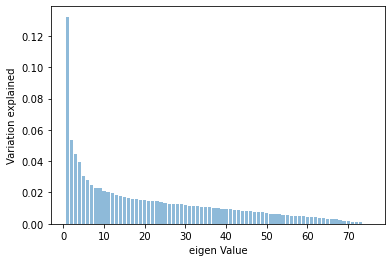

In [32]:
plt.bar(list(range(1,76)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

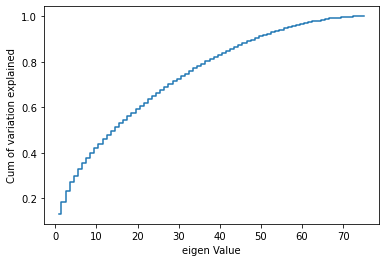

In [33]:
plt.step(list(range(1,76)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [34]:
pca3 = PCA(n_components=38)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)
#choosing the number of components 

[[-2.20132233e-03 -9.95179518e-03 -8.13353837e-02 ... -6.72193431e-03
  -2.08413109e-02  7.68770730e-02]
 [ 8.62916467e-03  8.68794458e-02  1.39019362e-02 ... -3.75174327e-02
   7.95397237e-05 -2.30600383e-03]
 [-5.41408321e-03 -2.04541265e-01  8.66594364e-02 ... -8.36598484e-03
  -8.84469667e-03 -7.14652966e-02]
 ...
 [ 2.02558759e-02 -3.97880044e-02 -9.51918793e-02 ...  9.16416940e-02
   3.00075347e-01 -2.28730211e-01]
 [-1.59053803e-04  3.69607717e-02 -4.21294794e-02 ...  1.18583148e-01
  -2.46513743e-01  2.46128071e-01]
 [-1.34788218e-01  3.26983709e-02 -2.81083612e-01 ...  3.18521672e-01
  -2.80776545e-02  2.69156754e-01]]
[0.1322285  0.05367922 0.04484676 0.0396107  0.03047381 0.02811444
 0.02482312 0.02309811 0.02267555 0.02084227 0.02031568 0.01953383
 0.01815091 0.01772234 0.01728341 0.01633473 0.01604693 0.01586266
 0.01514354 0.01495538 0.01467479 0.01464656 0.01428206 0.01396444
 0.01315057 0.01286113 0.01281518 0.01270304 0.01235764 0.01175947
 0.01157019 0.01136481 0.0111

In [35]:
Xpca3

array([[ 2.08599655,  0.45077905, -1.76598993, ...,  0.58246461,
        -0.68090677,  0.39967904],
       [ 0.23320511, -2.01198786,  1.17414499, ..., -0.63515452,
         0.07387069, -1.32085648],
       [ 2.5172163 ,  0.20494656, -1.42051498, ...,  0.18110415,
        -0.36086084,  1.29316529],
       ...,
       [ 1.72654786,  2.60573895,  0.17940582, ...,  2.21002963,
        -0.40533343,  1.11284613],
       [-2.75584919, -2.88083741,  1.78146503, ...,  1.33483501,
        -0.63725679, -0.01192077],
       [-0.67585753, -2.73564551,  1.46926106, ...,  0.50597285,
         0.31129336, -1.4331405 ]])

In [36]:
regression_model = LinearRegression()
regression_model.fit(XScaled, y)
regression_model.score(XScaled, y)
#checking linear regression model score with scaled values

0.8486462817506731

In [37]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca3, y)
regression_model_pca.score(Xpca3, y)
##checking linear regression pca  model score

0.8262375475759237

In [38]:
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor(n_estimators=500)
clf.fit(XScaled, y)
clf.score(XScaled, y)
#checking random forest regressor model score with scaled values

0.9821799938347042

In [39]:
from sklearn.ensemble import RandomForestRegressor
clf_pca=RandomForestRegressor(n_estimators=100)
clf_pca.fit(Xpca3, y)
clf_pca.score(Xpca3, y)
##checking random forest regressor pca  model score


0.9783516062613024

In [40]:
from sklearn.neighbors import KNeighborsRegressor
NNH = KNeighborsRegressor(n_neighbors= 13 ,metric='euclidean' )
NNH.fit(XScaled, y)
NNH.score(XScaled, y)
#checking KNeighbors regressor model score with scaled values

0.8056493691778633

In [41]:
NNH_pca = KNeighborsRegressor(n_neighbors= 13 ,metric='euclidean' )
NNH_pca.fit(Xpca3, y)
NNH_pca.score(Xpca3, y)
##checking KNeighbors regressor pca  model score

0.8047745329907043

In [49]:
from sklearn.tree import DecisionTreeRegressor
clf_d = DecisionTreeRegressor( max_depth=4, random_state=0)
clf_d.fit(XScaled, y)
clf_d.score(XScaled, y)
#checking decision tree regressor model score with scaled data

0.8100551207543109

In [50]:
from sklearn.tree import DecisionTreeRegressor
clf_pca = DecisionTreeRegressor( max_depth=4, random_state=0)
clf_pca.fit(Xpca3, y)
clf_pca.score(Xpca3, y)
##checking ecision tree regressor pca  model score

0.8650331047759457